# Ejemplos interactivos para acompañar las diapositivas 2-2_TC2008B_MatematicasGC.pdf

Por Jorge M. Cruz-Duarte (jorge.cruz@tec.mx)

In [53]:
# Numpy para cálculos con álgebra lineal
import numpy as np

## Ejemplos con vectores y puntos

Vectores y puntos

In [54]:
A = np.array([1, 2, 0])
B = np.array([2, 1, 0])
v = B - A
print(v)

print(np.array([0, 0, 0]) - np.array([1, -1, 0]))

[ 1 -1  0]
[-1  1  0]


Vectores canónicos

In [55]:
mag_v = np.sqrt(np.sum(v ** 2))
print(mag_v)

print(np.linalg.norm(v))

vu = v / mag_v
print(vu)

1.4142135623730951
1.4142135623730951
[ 0.70710678 -0.70710678  0.        ]


Suma/resta, producto con un escalar

In [56]:
u = np.random.rand(3)
print(u)

print(u + v)

alpha = 2
print(alpha * u)

[0.61036006 0.67435514 0.99779897]
[ 1.61036006 -0.32564486  0.99779897]
[1.22072012 1.34871028 1.99559795]


Producto punto / Producto Interior

In [57]:
# Dot product
u_dot_v = np.dot(u, v)
print(u_dot_v)

# Not-dot product
u_notdot_v = u * v
print(u_notdot_v)

# Angle
mag_u = np.linalg.norm(u)
cos_theta = u_dot_v / (mag_u * mag_v)
print(cos_theta)

theta = np.arccos(cos_theta)
print(theta) # degrees?

print(np.arccos(np.sum(u * v)))

-0.06399507553241457
[ 0.61036006 -0.67435514  0.        ]
-0.033515869226805675
1.6043184740003547
1.634835163605888


Producto cruz

In [58]:
u = [2, 0, 1]
v = [1, -1, 3]

u_cross_v = np.cross(u, v)
print(u_cross_v)

[ 1 -5 -2]


Aplicaciones: Ecuaciones Paramétricas

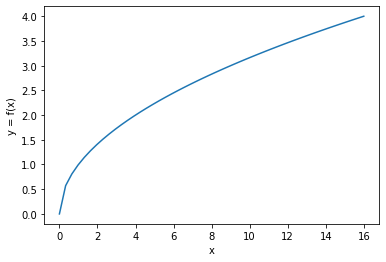

In [59]:
import matplotlib.pyplot as plt
x = np.linspace(0, 16, 50)
y = np.sqrt(x)
plt.figure()
plt.plot(x, y)
plt.xlabel('x'), plt.ylabel('y = f(x)')
plt.show()

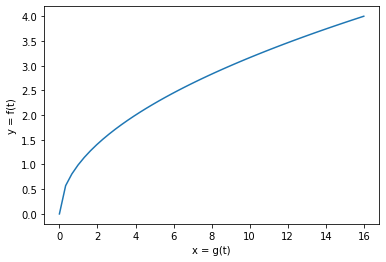

In [60]:
t = np.linspace(0, 16, 50)
x = t
y = np.sqrt(x)
plt.figure()
plt.plot(x, y)
plt.xlabel('x = g(t)'), plt.ylabel('y = f(t)')
plt.show()

Aplicaciones: Movimiento con vectores

In [61]:
# Cardumen
P0 = np.array([21, 32, 10]) # m
P1 = np.array([65, 10, 7]) # m
delta_t = 34 # s

velocidad = (P1 - P0) / delta_t
print(velocidad)

rapidez = np.linalg.norm(velocidad)
print(rapidez)

[ 1.29411765 -0.64705882 -0.08823529]
1.4495554741590126


Aplicaciones: Líneas

In [62]:
A = np.array([1, 2, 3])
B = np.array([0, 1, 6])
P_func = lambda t: A + t * (B - A)

print('P(0) = {}'.format(P_func(0)))
print('P(1) = {}'.format(P_func(1)))

P(0) = [1 2 3]
P(1) = [0 1 6]


Aplicaciones: Rayo reflejado

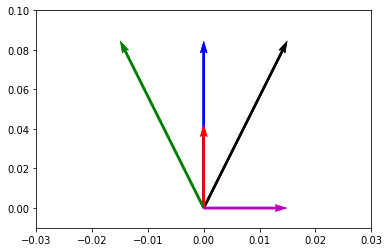

In [63]:
origin = np.array([[0, 0],[0, 0]]) # origin point
vector = np.array([1, 2])
normal = np.array([0, 1])

paralelo = normal * np.dot(normal, vector)
perpendicular = vector - paralelo
reflejado = paralelo - perpendicular

ax = plt.axes()
plt.ion()

plt.quiver(*origin, *vector, color='k', scale=4)
plt.quiver(*origin, *paralelo, color='b', scale=4)
plt.quiver(*origin, *normal, color='r', scale=4)
plt.quiver(*origin, *reflejado, color='g', scale=4)
plt.quiver(*origin, *perpendicular, color='m', scale=4)

plt.ioff()
plt.ylim([-0.01, 0.1])
plt.xlim([-0.03, 0.03])
plt.show()

## Ejemplos con transformaciones y matrices

Multiplicacióón de matrix-vector

In [64]:
M = np.matrix([[3, 7], [12, 98]])
v = np.array([4, 6])

# Old fashion
Mv = np.zeros((1, 2))
for i in range(M.shape[0]):
  for j in range(M.shape[1]):
    Mv[0][i] += M[i,j] * v[j]
print(Mv)

# New fashion
print(np.matmul(M, v))


[[ 54. 636.]]
[[ 54 636]]


In [65]:
# Other example
M2 = [[2, 4, 2], 
      [8, 2, 1], 
      [4, 2, 8]]
v2 = [4, 10, 2]

Mv2 = np.matmul(M2, v2)
print(Mv2)

[52 54 52]


Traslación Homogénea

In [66]:
def translationMatrix(vector):
  matrix = np.identity(len(vector) + 1)
  matrix[-1,:-1] = vector
  return matrix.T

print(translationMatrix([2, 3, 4]))

# Get the new point
Q0 = np.array([1, 2, 3, 1])
Q1 = np.matmul(translationMatrix([2, 3, 4]), Q0)

print('from {} to {}'.format(Q0, Q1))

[[1. 0. 0. 2.]
 [0. 1. 0. 3.]
 [0. 0. 1. 4.]
 [0. 0. 0. 1.]]
from [1 2 3 1] to [3. 5. 7. 1.]


Escala Homogénea

In [67]:
def scaleMatrix(vector):
  return np.diag([*vector, 1])

print(scaleMatrix([2, 3, 4]))

# Get the new point
Q0 = np.array([1, 2, 3, 1])
Q1 = np.matmul(scaleMatrix([2, 3, 4]), Q0)
print('from {} to {}'.format(Q0, Q1))

[[2 0 0 0]
 [0 3 0 0]
 [0 0 4 0]
 [0 0 0 1]]
from [1 2 3 1] to [ 2  6 12  1]


Rotación Homogénea

In [68]:
def rotationMatrix(angle_degrees, axis='x', dim=3):
  angle = np.deg2rad(angle_degrees)
  ii = np.cos(angle)
  ji = np.sin(angle)
  matrix = np.identity(dim + 1)
  if axis == 'z':
    matrix[0, 0] = ii
    matrix[1, 1] = ii
    matrix[0, 1] = -ji
    matrix[1, 0] = ji
  elif axis == 'y':
    matrix[0, 0] = ii
    matrix[2, 2] = ii
    matrix[0, 2] = -ji
    matrix[2, 0] = ji
  else:
    matrix[1, 1] = ii
    matrix[2, 2] = ii
    matrix[1, 2] = -ji
    matrix[2, 1] = ji
  return matrix

print(rotationMatrix(15))

# Get the new point
Q0 = np.array([1, 0, 0, 1])
Q1 = np.matmul(rotationMatrix(90), Q0)
print('from {} to {}'.format(Q0, Q1))

[[ 1.          0.          0.          0.        ]
 [ 0.          0.96592583 -0.25881905  0.        ]
 [ 0.          0.25881905  0.96592583  0.        ]
 [ 0.          0.          0.          1.        ]]
from [1 0 0 1] to [1. 0. 0. 1.]


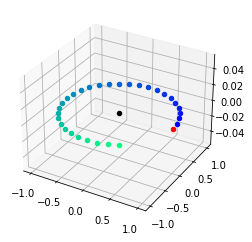

In [69]:
# Viz
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')

plt.ion()
ax.scatter(0, 0, 0, c='k')
ax.scatter(*Q0[:-1], c='r')

Qaux = Q0
for color in plt.cm.winter(np.linspace(0, 1, 30)):
  Qaux = np.matmul(rotationMatrix(10, 'z'), Qaux)
  ax.scatter(*Qaux[:-1], color=color) 

plt.show()

Rotación alrededor de un punto pivote

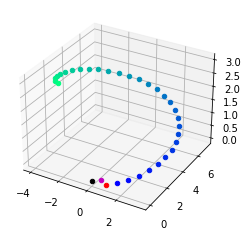

In [70]:
Q0 = np.array([1, 0, 0, 1])
pivot = [0.6, 0.1, 0.1]
traM = translationMatrix(pivot)
rotM = rotationMatrix(10, 'z')

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')

plt.ion()
ax.scatter(0, 0, 0, c='k')
ax.scatter(*pivot, c='m')
ax.scatter(*Q0[:-1], c='r')

Qaux = Q0
# for color in plt.cm.winter(np.linspace(0, 1, 30)):
  # Translate from a point to the origin
Qaux = np.matmul(np.linalg.inv(traM), Qaux)

  # Rotate
Qaux = np.matmul(rotM, Qaux)

  # Translate from a point to the origin
Qaux = np.matmul(traM, Qaux)

ax.scatter(*Qaux[:-1], color=color) 

plt.show()

Ejemplo adiciona: ¿qué pasa si se incluye la escala?

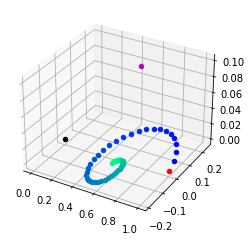

In [71]:
scaM = scaleMatrix([0.95, 0.95, 0.95])

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')

plt.ion()
ax.scatter(0, 0, 0, c='k')
ax.scatter(*pivot, c='m')
ax.scatter(*Q0[:-1], c='r')

Qaux = Q0
for color in plt.cm.winter(np.linspace(0, 1, 50)):
  # Translate from a point to the origin
  Qaux = np.matmul(np.linalg.inv(traM), Qaux)  

  # Rotate
  Qaux = np.matmul(rotM, Qaux)

  # Scale (uncomment next line)
  # Qaux = np.matmul(scaM, Qaux)

  # Translate from a point to the origin
  Qaux = np.matmul(traM, Qaux)

  # Scale (comment next line)
  Qaux = np.matmul(scaM, Qaux)
  
  ax.scatter(*Qaux[:-1], color=color) 

plt.show()

Ejemplo: Imagen 100 por 100

In [72]:
w = 100 # ancho
h = 100 # alto

M2 = translationMatrix([w/2, h/2])
M1 = np.linalg.inv(M2)
R30 = rotationMatrix(30, 'z', 2)

print('M1 = {}'.format(M1))
print('M2 = {}'.format(M2))
print('R30 = {}'.format(R30))

R30M1 = np.matmul(R30, M1)
print('R30M1 = {}'.format(R30M1))

M = np.matmul(M2, R30M1)
print('M = {}'.format(M))

M1 = [[  1.   0. -50.]
 [  0.   1. -50.]
 [  0.   0.   1.]]
M2 = [[ 1.  0. 50.]
 [ 0.  1. 50.]
 [ 0.  0.  1.]]
R30 = [[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]
R30M1 = [[  0.8660254   -0.5        -18.30127019]
 [  0.5          0.8660254  -68.30127019]
 [  0.           0.           1.        ]]
M = [[  0.8660254   -0.5         31.69872981]
 [  0.5          0.8660254  -18.30127019]
 [  0.           0.           1.        ]]


## Ejercicios

Encuentra el ángulo (en grados) que existe entre los vectores: 

In [73]:
# Datos:
u = [1.077, 4.501, 7.523]
v = [-6.530, -1.382, 2.369]

# angle(u, v) = ???

Encuentra el producto cruz entre los vectores:

In [74]:
# Datos:
u = [1.077, 4.501, 7.523]
v = [-6.530, -1.382, 2.369]

# u x v = ???

Multiplicación de matrices

In [75]:
# Datos:
M1 = [[7, 2, 2],
      [6, 1, 1],
      [0, 6, -2]]
M2 = [[6, 7, 6],
      [-2, 3, 2],
      [5, -1, -2]]

# M1 * M2 = ???

In [76]:
# Datos:
M3 = [[0, 7, 3],
      [0, 0, 1]]
M4 = [[4, 7],
      [3, 5],
      [7, 1]]

# M3 * M4 = ???

Rotar el punto B, 22º en el eje Y tomando A como el pivote de rotación.

In [77]:
# Datos:
A = [1, 2, 0]
B = [2, 1, 0]
angle = 22 # grados

Teniendo un cubo de lado 2.5 unidades, con centro en C = [7, -2.2, 3.01]:
*   Localiza sus vértices
*   Encuentra la posición final de cada véertice al rotar el cubo con respecto al pivote P = [-0.23, 4.1, 0.81]
*   Usa el eje Z para rotar



In [78]:
# Datos:
lado = 2.5
C = [7, -2.2, 3.01]
P = [-0.23, 4.1, 0.81]